SIFT/SURF/ORB/STAR/FAST

# Harris Corner Detection

See https://docs.opencv.org/3.2.0/dc/d0d/tutorial_py_features_harris.html for more detail

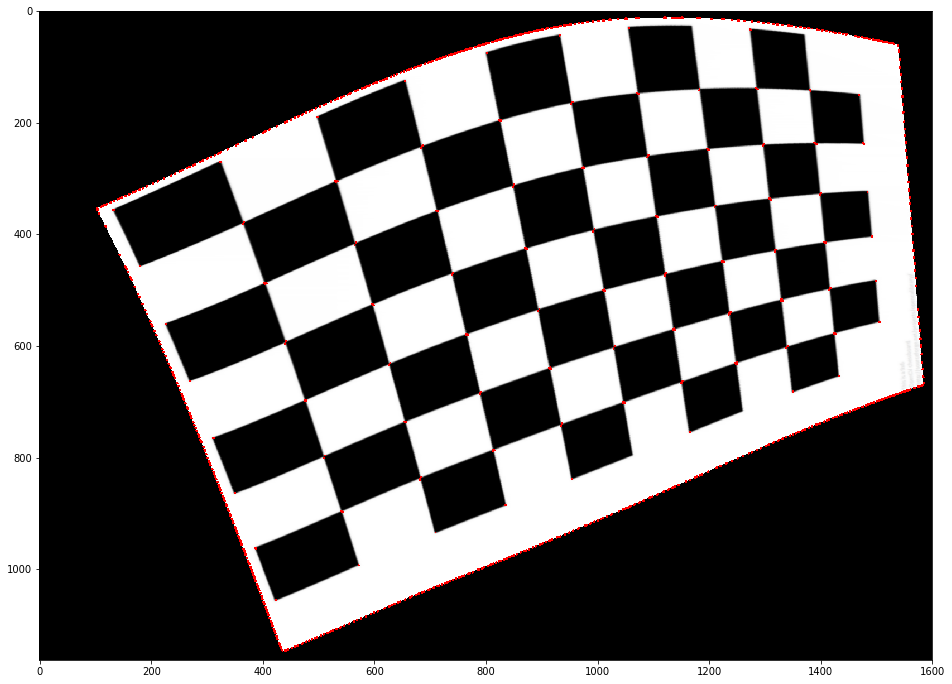

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

filename = 'chessboard.png'


img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);

plt.figure(figsize=(16, 12))
plt.imshow(img)
plt.show()

# cv2.imshow('dst',img)
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()


# Refined Harris Corners

You may have to zoom-in image to see the refined corners. They are as small as one pixel. 

dst: [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


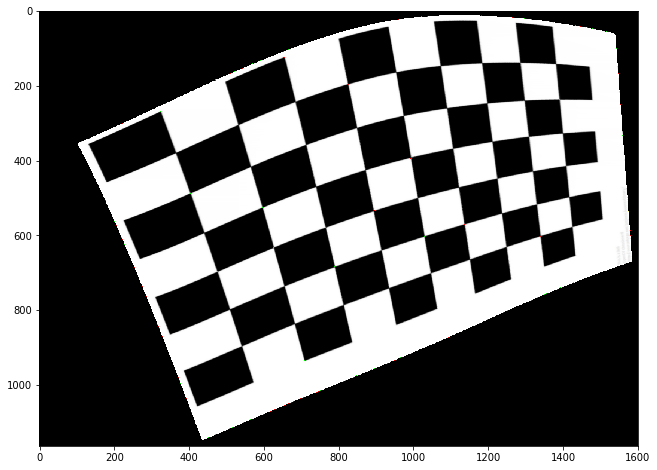

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


filename = 'chessboard.png'


img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# print('dst:', dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.show()